In [ ]:
from radonpy.core.poly import amorphous_cell, polymerize_mols, terminate_rw
from radonpy.core.utils import mol_from_smiles
from radonpy.ff.gaff2 import GAFF2
from radonpy.sim.preset.eq import EQ21step
from rdkit import Chem
from rdkit.Chem.rdDistGeom import EmbedMolecule
from rdkit.Chem.rdPartialCharges import ComputeGasteigerCharges


In [2]:
ff = GAFF2()

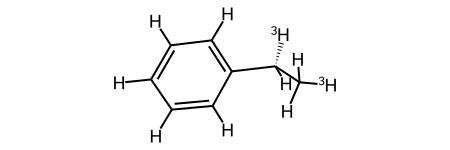

In [3]:
mono = mol_from_smiles("*CC(c1ccccc1)*")
ComputeGasteigerCharges(mono)
mono

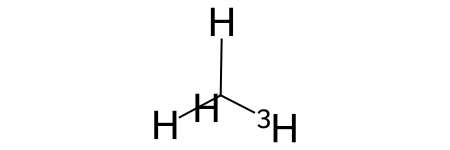

In [4]:
ter = Chem.MolFromSmiles("[3H]C")
ter = Chem.AddHs(ter)
EmbedMolecule(ter)
ComputeGasteigerCharges(ter)
ter

RadonPy info: Start terminate_rw.


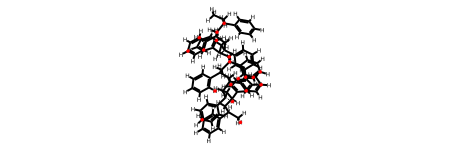

In [5]:
poly = polymerize_mols(mono, n=10)
poly = terminate_rw(poly, ter)
ff.ff_assign(poly, charge="gasteiger")
poly

RadonPy info: Start amorphous cell generation.


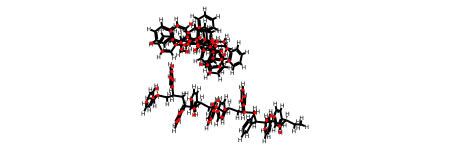

In [6]:
ac = amorphous_cell(poly, n=2, density=0.3)
ac

RadonPy info: OPENMP package is available.
RadonPy info: OPT package is available.
RadonPy info: Packing simulation (eq1) by LAMMPS is running...
RadonPy info: Complete packing simulation (eq1). Elapsed time = 0:05:56.367817
RadonPy info: Larsen's 21 step compression/decompression equilibration (eq2) by LAMMPS is running...
RadonPy info: Complete Larsen 21 step compression/decompression equilibration (eq2). Elapsed time = 0:58:16.842036
RadonPy info: Sampling simulation (eq3) by LAMMPS is running...
RadonPy info: Complete sampling simulation (eq3). Elapsed time = 1:56:51.024437


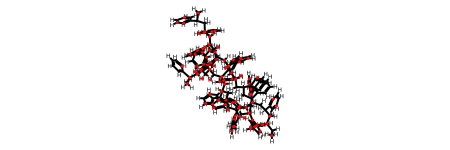

In [7]:
eq = EQ21step(ac)
# eq.make_lammps_input()
eq.exec(mpi=8, omp=2)